In [5]:
import easyocr
import PIL
from PIL import Image
from PIL import ImageDraw
import pandas as pd
import cv2
import re
import mysql.connector
from sqlalchemy import create_engine

In [6]:
#import easyocr
import PIL
from PIL import Image
from PIL import ImageDraw
import pandas as pd
#import cv2
import re
import mysql.connector

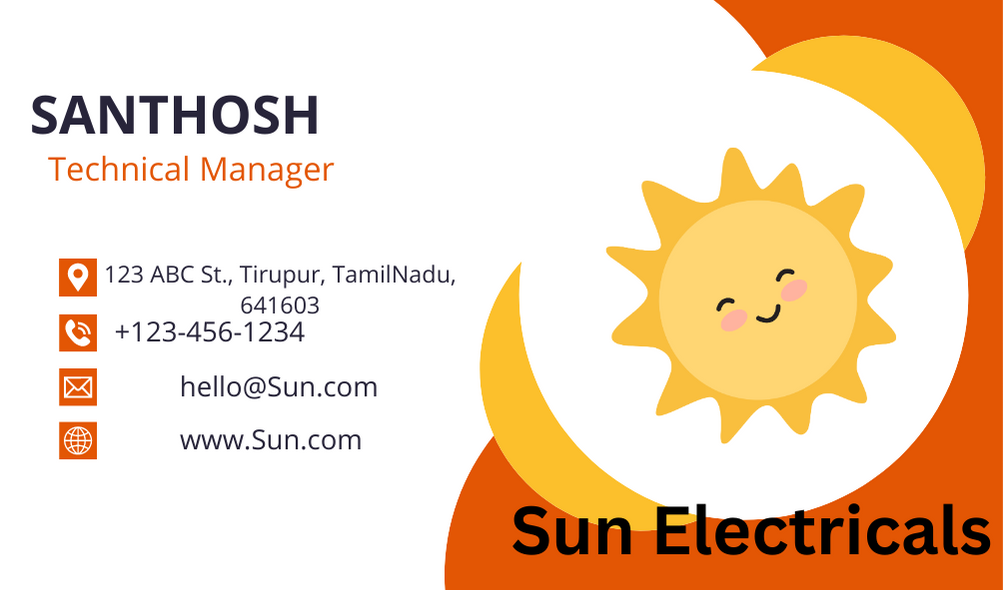

In [7]:
image_path="C:\\Users\\Vignesh T\\Downloads\\5.png"
A=Image.open(image_path)
A

In [8]:
reader=easyocr.Reader(["en"])
result=reader.readtext(image_path,paragraph="False")
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[[[[26, 87], [343, 87], [343, 198], [26, 198]], 'SANTHOSH Technical Manager'],
 [[[102, 259], [459, 259], [459, 348], [102, 348]],
  '123 ABC St , Tirupur; TamilNadu, 641603 +123-456-1234'],
 [[[176, 368], [383, 368], [383, 454], [176, 454]],
  'hello@Sun.com www.Suncom'],
 [[[506, 492], [1000, 492], [1000, 568], [506, 568]], 'Sun Electricals']]

In [9]:
dict1=[]
for i in result:
    A=str(i[-1])
    dict1.append(A)
dict1

['SANTHOSH Technical Manager',
 '123 ABC St , Tirupur; TamilNadu, 641603 +123-456-1234',
 'hello@Sun.com www.Suncom',
 'Sun Electricals']

In [10]:
data1=", ".join([str(item) for item in dict1])
print(data1)

SANTHOSH Technical Manager, 123 ABC St , Tirupur; TamilNadu, 641603 +123-456-1234, hello@Sun.com www.Suncom, Sun Electricals


In [12]:
sql_data={}

#name=re.findall(r'^(w+))',data1)
#sql_data['name']=name

name = re.findall(r'^(\w+)', data1)
sql_data['name'] = name

#email=re.findall(r'\w+@\w+.\w',data1)
#sql_data['email']=email

email = re.findall(r'\w+@\w+\.\w+', data1)
sql_data['email'] = email


website=re.findall(r'WWW \w+.\w+',data1) or re.findall(r'WWW \w+.\w+',data1) or re.findall(r'WWW \w+.\w+',data1) or re.findall(r'WWW \w+.\w+',data1) 
sql_data['website']=website

phone=re.findall(r'\+\d+-\d+-\d+',data1) or re.findall(r'\+\d+-\d+-\d+',data1)
sql_data['phone']=phone

pincode=re.findall(r'\d{6}',data1)
sql_data['pincode']=pincode


state=re.findall(r'TamilNadu',data1)
sql_data['state']=state

city=re.findall(r'\d+ \w+ \w+',data1)
sql_data['city']=city


company=re.findall(r'([^,]+)$',data1)
sql_data['company']=company

designation=re.findall(r'[A-Z]{3}+ & +[A-Z]+',data1) or re.findall(r'[A-Z]{3}+ & +[A-Z]+',data1) or re.findall(r'[A-Z]{3}+ & +[A-Z]+',data1) or re.findall(r'[A-Z]{3}+ & +[A-Z]+',data1)
sql_data['designation']=designation


sql_data



{'name': ['SANTHOSH'],
 'email': ['hello@Sun.com'],
 'website': [],
 'phone': ['+123-456-1234'],
 'pincode': ['641603'],
 'state': ['TamilNadu'],
 'city': ['123 ABC St'],
 'company': [' Sun Electricals'],
 'designation': []}

In [13]:
list_sql=[]
for i in sql_data.values():
    list_sql.extend(i)
l=list_sql[0]

In [14]:
A=sql_data.keys()
B=pd.DataFrame(columns=A)
B

,name,email,website,phone,pincode,state,city,company,designation


In [16]:
sql_data = {'name': name, 'email': email, 'website': website,
 'phone': phone,
 'pincode': pincode,
 'state': state,
 'city': city,
 'company': company,
 'designation': designation}

In [17]:
table=pd.DataFrame(sql_data)
table

ValueError: All arrays must be of the same length

In [ ]:
host='localhost'
user='root'
password=''
database='Bizcard'
mydb=mysql.connector.connect(host=host,user=user,password=password,database=database)
print(mydb)
mycursor=mydb.cursor(buffered=True)

In [ ]:
engine=create_engine(f'mysql://{user}:{password}@{host}/{database}')

In [ ]:
table_name='card_data'
table.to_sql(table_name,con=engine,if_exists='append',index=False)

In [ ]:
query="""SELECT name FROM card_data"""
mycursor.execute(query)
data=mycursor.fetchall()
mydb.commit()
df1=pd.DataFrame(data,columns=mycursor.column_names)
df1

A=[]
for i in data:
    A.append(i[0])

if l in A:
    print('Channel exists')

else:
    table_name = 'card_data' 
    table.to_sql(table_name,con=engine,index=False)
    print('new_id')   

    
